# Комп’ютерний практикум *No*2. Навчання рекурентних нейронних мереж LSTM i GRU засобами TensorFlow2 для прогнозування часового ряду

In [231]:
import tensorflow as tf
import pandas as pd
from keras.models import Sequential

from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import MinMaxScaler

## Пiдготувати початковi часовi ряди. Розбити їх на навчальний i тестовий набори у спiввiдношеннi 1:3, вiдповiдно.

In [232]:
df = pd.read_csv('./samples/Shanghai license plate price.csv', index_col=0)

In [233]:
df.head(5)

,Total number of license issued,lowest price,avg price,Total number of applicants
Date,,,,
Jan-02,1400,13600,14735,3718
Feb-02,1800,13100,14057,4590
Mar-02,2000,14300,14662,5190
Apr-02,2300,16000,16334,4806
May-02,2350,17800,18357,4665


Будемо прогнозувати значення 'Close', видалимо зайві колонки

In [234]:
#df = df.drop(['Adj Close', 'Volume'], axis=1)
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df)

# Create a new DataFrame with the normalized data
df = pd.DataFrame(normalized_data, columns=df.columns)

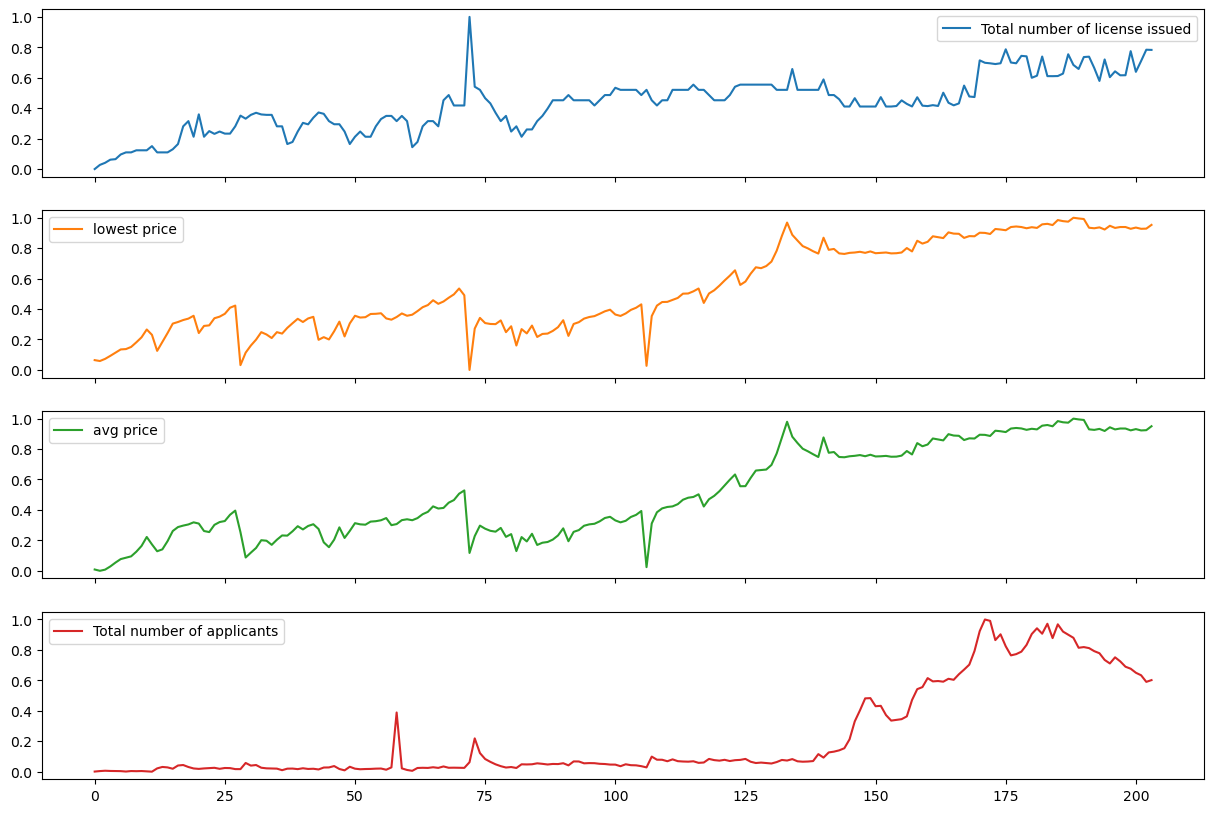

In [235]:
df.plot(subplots=True, figsize=(15, 10));

In [236]:
inputs = df[['lowest price', 'Total number of license issued', 'Total number of applicants']]
targets= df['avg price']

In [237]:
inputs = (inputs - inputs.mean())/inputs.std()

Додамо історичні дані за 3 дні

In [238]:
k = 3
sequences = []
y = []
for i in range(k, len(inputs)):
    sequence = inputs.iloc[i-k:i, :].values
    y.append(targets.iloc[i])
    sequences.append(sequence)

# Convert the list of input sequences and targets to numpy arrays
X = np.array(sequences)
y = np.array(y)

# Split the data into training and validation sets
split = int(0.75 * len(X))
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [239]:
x_train

array([[[-1.66675582, -2.38393821, -0.74106779],
        [-1.6952761 , -2.23098252, -0.73081884],
        [-1.66982658, -2.15450467, -0.72376681]],

       [[-1.6952761 , -2.23098252, -0.73081884],
        [-1.66982658, -2.15450467, -0.72376681],
        [-1.59949338, -2.0397879 , -0.72828011]],

       [[-1.66982658, -2.15450467, -0.72376681],
        [-1.59949338, -2.0397879 , -0.72828011],
        [-1.51439525, -2.02066844, -0.72993734]],

       ...,

       [[ 0.84740391, -0.0896028 ,  0.55654115],
        [ 0.82187026, -0.0896028 ,  0.80989711],
        [ 0.85484947, -0.0896028 ,  0.81484529]],

       [[ 0.82187026, -0.0896028 ,  0.80989711],
        [ 0.85484947, -0.0896028 ,  0.81484529],
        [ 0.81720101, -0.0896028 ,  0.64385705]],

       [[ 0.85484947, -0.0896028 ,  0.81484529],
        [ 0.81720101, -0.0896028 ,  0.64385705],
        [ 0.82098689,  0.25454752,  0.65172006]]])

## Побудувати першу модель, використовуючи один шар базових рекурентних нейронiв, та аналогiчнi моделi iз одним шаром комiрок LSTM i GRU.

### Модель з одним шаром базових рекурентних нейронів

In [240]:
model_rnn = Sequential()
model_rnn.add(layers.SimpleRNN(units=32))
model_rnn.add(layers.Dense(units=1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

### Модель з одним шаром LSTM

In [241]:
model_lstm = Sequential()
model_lstm.add(layers.LSTM(units=32))
model_lstm.add(layers.Dense(units=1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

### Модель з одним шаром GRU

In [242]:
model_gru = Sequential()
model_gru.add(layers.GRU(units=32,))
model_gru.add(layers.Dense(units=1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')

## Навчити цi три моделi на навчальних даних. Використати функцiю втрат Mean Squared Error (MSE). Побудувати графiки значень функцiї втрат залежно вiд кiлькостi епох на навчальнiй i тестовiй множинах.

### Модель з одним шаром базових рекурентних нейронів

In [243]:
history = model_rnn.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 0s 20ms/step - loss: 0.2145 - val_loss: 1.9758
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1485 - val_loss: 1.9380
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1096 - val_loss: 1.7917
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0896 - val_loss: 1.6126
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0754 - val_loss: 1.6020
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0677 - val_loss: 1.5459
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0596 - val_loss: 1.3286
Epoch 8/100
5/5 [==============================] - 0s 3

Loss тренувального набору

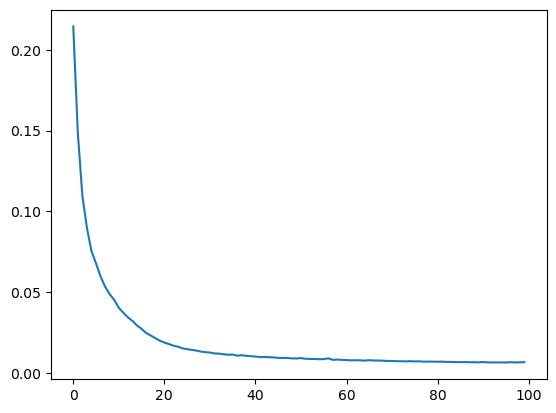

In [244]:
plt.plot(history.history['loss'])

Loss тестувального набору

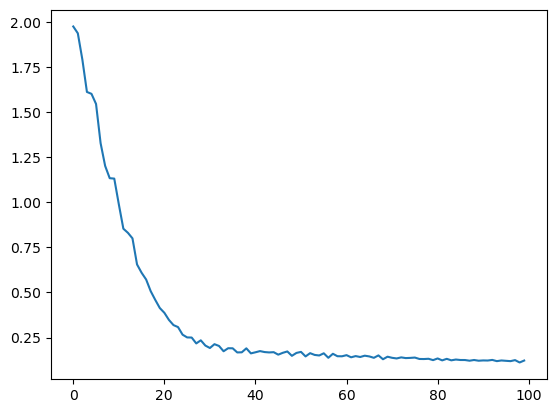

In [245]:
plt.plot(history.history['val_loss'])

### Модель з одним шаром lstm

In [246]:
history = model_lstm.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 40ms/step - loss: 0.1147 - val_loss: 1.3677
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 1.3498
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0694 - val_loss: 1.2872
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0540 - val_loss: 1.2133
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0423 - val_loss: 1.1251
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0349 - val_loss: 1.0058
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.9033
Epoch 8/100
5/5 [==============================] - 0s 4

Loss тренувального набору

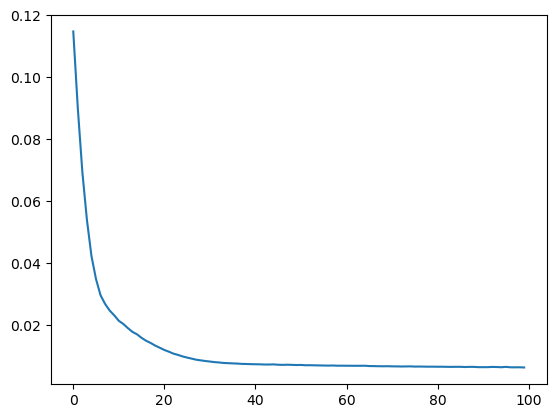

In [247]:
plt.plot(history.history['loss'])

Loss тестувального набору

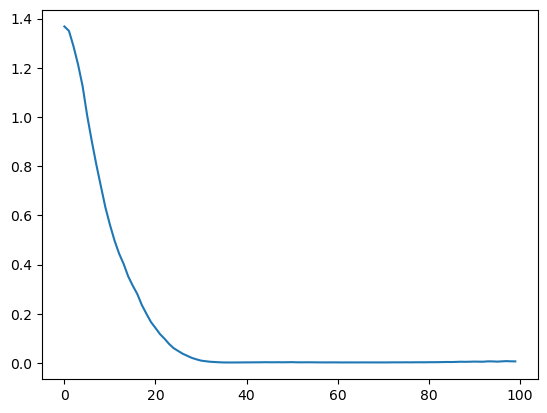

In [248]:
plt.plot(history.history['val_loss'])

### Модель з одним шаром GRU

In [249]:
history = model_gru.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 41ms/step - loss: 0.4320 - val_loss: 0.0791
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2924 - val_loss: 0.1431
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.2268
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1164 - val_loss: 0.3185
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0707 - val_loss: 0.4025
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.4695
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0338 - val_loss: 0.5082
Epoch 8/100
5/5 [==============================] - 0s 4

Loss тренувального набору

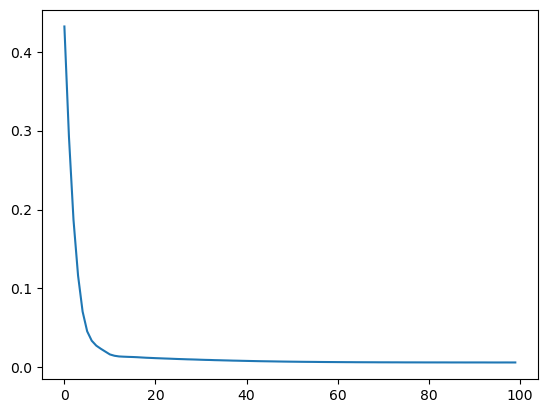

In [250]:
plt.plot(history.history['loss'])

Loss тестувального набору

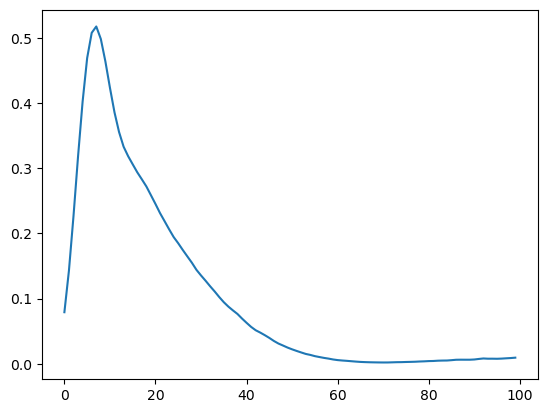

In [251]:
plt.plot(history.history['val_loss'])

## Побудувати прогнози на тестовому наборi даних. Оцiнити якiсть прогнозiв на тестовому наборi, використовуючи RMSE, MAE та MAPE. Вiдобразити графiки реальних даних та прогнозiв на однiй координатнiй вiсi (окремо по кожнiй моделi).

In [252]:
rmse = tf.keras.metrics.RootMeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()
mape = tf.keras.metrics.MeanAbsolutePercentageError()

### Модель з одним шаром базових рекурентних нейронів

In [253]:
y_pred = model_rnn.predict(x_test)

2/2 [==============================] - 0s 1ms/step


In [254]:
rmse.update_state(y_test, y_pred)
rmse_rnn = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_rnn = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_rnn = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_rnn}', f'MAE: {mae_rnn}', f'MAPE: {mape_rnn}')

RMSE: 0.34984090924263 MAE: 0.30774354934692383 MAPE: 32.8781852722168


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


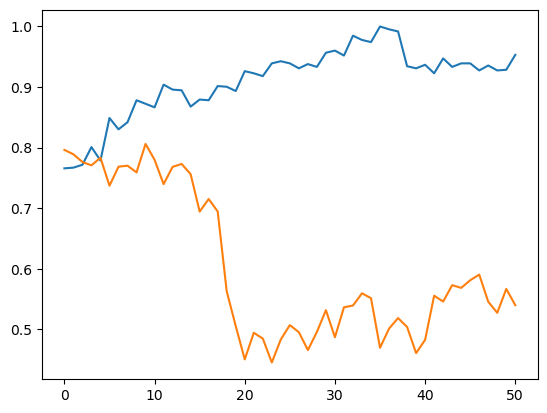

In [255]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

### Модель з одним шаром lstm

In [256]:
y_pred = model_lstm.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [257]:
rmse.update_state(y_test, y_pred)
rmse_lstm = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_lstm = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_lstm = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_lstm}', f'MAE: {mae_lstm}', f'MAPE: {mape_lstm}')

RMSE: 0.08276216685771942 MAE: 0.06855735927820206 MAPE: 7.371285438537598


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


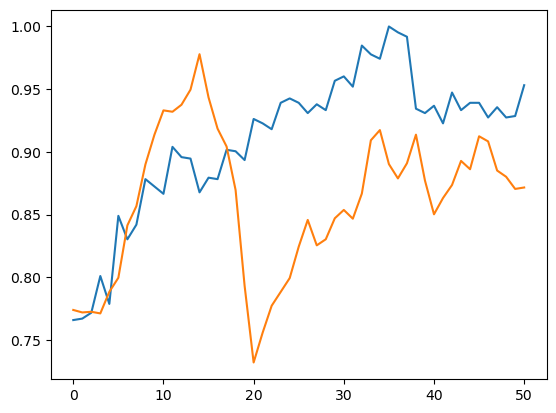

In [258]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

### Модель з одним шаром GRU

In [259]:
y_pred = model_gru.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [260]:
rmse.update_state(y_test, y_pred)
rmse_gru = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_gru = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_gru = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_gru}', f'MAE: {mae_gru}', f'MAPE: {mape_gru}')

RMSE: 0.09619010239839554 MAE: 0.08241627365350723 MAPE: 8.838390350341797


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


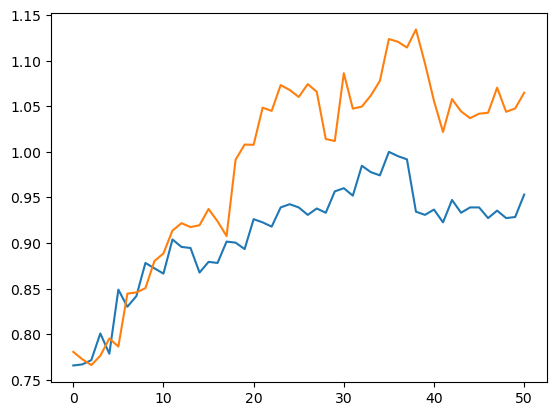

In [261]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

## Порiвняти результати, отриманi моделями на основi базових рекурентних нейронiв, комiрок LSTM i GRU.

### Результати для тренувального набору

In [262]:
y_pred = model_gru.predict(x_train)

5/5 [==============================] - 0s 1ms/step


In [263]:
rmse.update_state(y_train, y_pred)
rmse_gru = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_train, y_pred)
mae_gru = mae.result().numpy()
mae.reset_state()

mape.update_state(y_train, y_pred)
mape_gru = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_gru}', f'MAE: {mae_gru}', f'MAPE: {mape_gru}')

RMSE: 0.07884534448385239 MAE: 0.04720482602715492 MAPE: 3461612.0


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/9998284.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


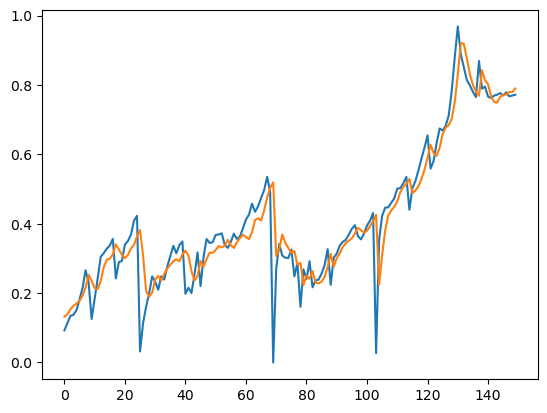

In [264]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_train))), y_train, list(range(len(y_train))), y_pred)
fig.show()

### Висновок

Результати з усіх вищезазначених моделей не мають великої разниці. Проте, на графіках можна побачити, що там, де на реальних даних наявні спаданная та зростання цін, мережа всеж таки вловила тренд

## Побудувати i навчити глибоку модель з декiлькома рекурентними шарами LSTM, а також глибоку модель з декiлькома шарами GRU.

In [265]:
deep_lstm_model = Sequential()
deep_lstm_model.add(layers.LSTM(16, input_shape=(3, 3), return_sequences=True))
deep_lstm_model.add(layers.LSTM(8))
deep_lstm_model.add(layers.Dense(1))

# Compile the deep_lstm_model
deep_lstm_model.compile(loss='mse', optimizer='adam')
history = deep_lstm_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 64ms/step - loss: 0.2128 - val_loss: 0.7089
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1876 - val_loss: 0.7218
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1652 - val_loss: 0.7250
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1446 - val_loss: 0.7241
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1254 - val_loss: 0.7172
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1071 - val_loss: 0.7030
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0890 - val_loss: 0.6859
Epoch 8/100
5/5 [==============================] - 0s 5

In [266]:
deep_gru_model = Sequential()
deep_gru_model.add(layers.GRU(16, return_sequences=True, input_shape=(3, 3)))
deep_gru_model.add(layers.GRU(8))
deep_gru_model.add(layers.Dense(1))

deep_gru_model.compile(loss='mse', optimizer='adam')
history = deep_gru_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 67ms/step - loss: 0.2877 - val_loss: 0.6889
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2170 - val_loss: 0.6914
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1666 - val_loss: 0.6590
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1239 - val_loss: 0.6103
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0894 - val_loss: 0.5476
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0644 - val_loss: 0.4776
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.4014
Epoch 8/100
5/5 [==============================] - 0s 4

## Додати дропаути мiж рекурентними шарами цих моделей, а саме, спробувати застосувати дропаут до входiв кожного шару, виходiв та станiв кожного шару.

In [267]:
lstm_dropouts_model = Sequential()
lstm_dropouts_model.add(layers.Dropout(0.1, input_shape=(3, 3)))
lstm_dropouts_model.add(layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
lstm_dropouts_model.add(layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2))
lstm_dropouts_model.add(layers.Dropout(0.1))
lstm_dropouts_model.add(layers.Dense(1))

lstm_dropouts_model.compile(loss='mse', optimizer='adam')
history = lstm_dropouts_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.1936 - val_loss: 0.9774
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1783 - val_loss: 0.9688
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1617 - val_loss: 0.9627
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1509 - val_loss: 0.9533
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1357 - val_loss: 0.9374
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1212 - val_loss: 0.9185
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1090 - val_loss: 0.8948
Epoch 8/100
5/5 [==============================] - 0s 6

In [268]:
gru_dropouts_model = Sequential()
gru_dropouts_model.add(layers.Dropout(0.1, input_shape=(3, 3)))
gru_dropouts_model.add(layers.GRU(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
gru_dropouts_model.add(layers.GRU(8, dropout=0.2, recurrent_dropout=0.2))
gru_dropouts_model.add(layers.Dropout(0.1))
gru_dropouts_model.add(layers.Dense(1))

gru_dropouts_model.compile(loss='mse', optimizer='adam')
history = gru_dropouts_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 0.2976 - val_loss: 0.6142
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2300 - val_loss: 0.6717
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1846 - val_loss: 0.7230
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1319 - val_loss: 0.7628
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1123 - val_loss: 0.7886
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0898 - val_loss: 0.8003
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0783 - val_loss: 0.7985
Epoch 8/100
5/5 [==============================] - 0s 4

## Зробити висновки щодо якостi прогнозу на основi глибоких моделей RNN i моделей RNN з дропаутами.

### Глибока модель LSTM

In [269]:
y_pred = deep_lstm_model.predict(x_test)

2/2 [==============================] - 0s 1ms/step


In [270]:
rmse.update_state(y_test, y_pred)
rmse_rnn = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_rnn = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_rnn = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_rnn}', f'MAE: {mae_rnn}', f'MAPE: {mape_rnn}')

RMSE: 0.03489860147237778 MAE: 0.025917306542396545 MAPE: 2.834088087081909


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


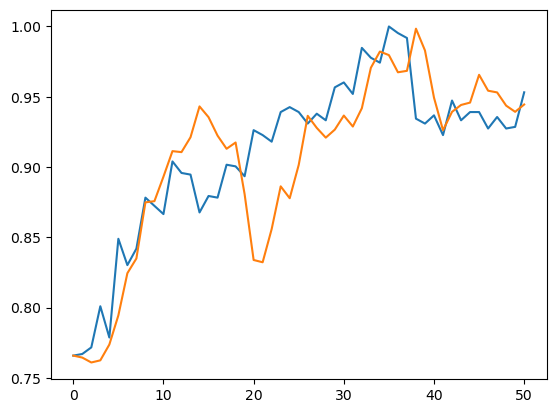

In [271]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

### Глибока модель LSTM з додаванням дропаутів

In [272]:
y_pred = lstm_dropouts_model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [273]:
rmse.update_state(y_test, y_pred)
rmse_rnn = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_rnn = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_rnn = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_rnn}', f'MAE: {mae_rnn}', f'MAPE: {mape_rnn}')

RMSE: 0.0393734946846962 MAE: 0.03344238921999931 MAPE: 3.658465623855591


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


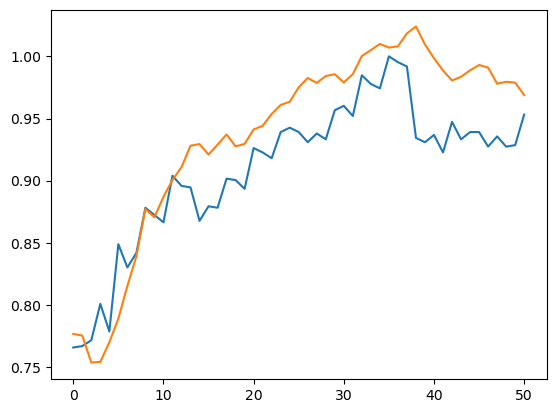

In [274]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

### Глибока модель GRU

In [275]:
y_pred = deep_gru_model.predict(x_test)

2/2 [==============================] - 0s 1ms/step


In [276]:
rmse.update_state(y_test, y_pred)
rmse_rnn = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_rnn = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_rnn = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_rnn}', f'MAE: {mae_rnn}', f'MAPE: {mape_rnn}')

RMSE: 0.1913309097290039 MAE: 0.1575862467288971 MAPE: 16.779266357421875


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


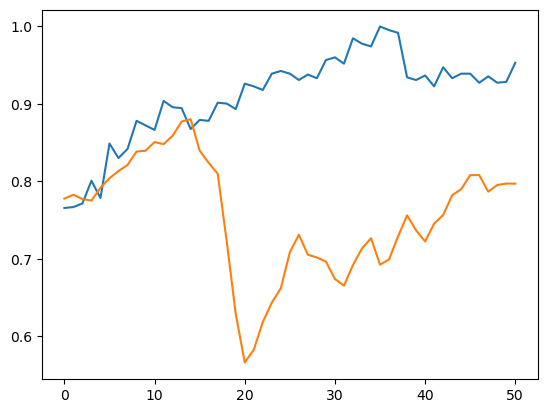

In [277]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

### Глибока модель GRU з додаванням дропаутів

In [278]:
y_pred = gru_dropouts_model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [279]:
rmse.update_state(y_test, y_pred)
rmse_rnn = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_rnn = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_rnn = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_rnn}', f'MAE: {mae_rnn}', f'MAPE: {mape_rnn}')

RMSE: 0.03311760723590851 MAE: 0.027101092040538788 MAPE: 3.0201902389526367


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


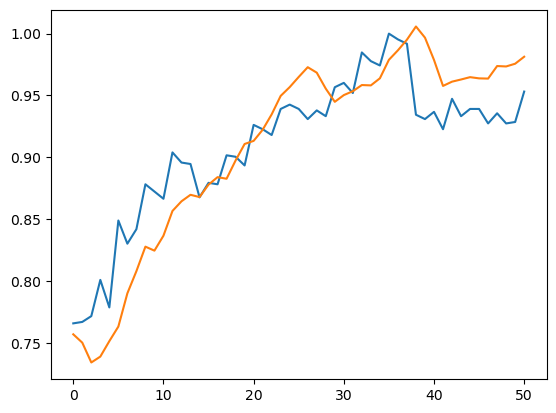

In [280]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

### Висновок

В цілому всі моделі, нажаль, не виявили здатності пристосуватися до дуже великого росту ціни у тестувальному наборі. Можна зазначити, що додавання дропаутів позитивно впливає на похибку, хоча не дуже значно. З моделей з використанням GRU або LSTM останні показали себе дещо краще, ніж інші

## Побудувати i навчити глибоку модель зi згортковими шарами conv1D та шарами max_pool1D.

In [281]:
model = Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(3, 3), padding='same',))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 0s 13ms/step - loss: 0.2014 - val_loss: 0.3222
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 0.1696
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0607 - val_loss: 0.0808
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.0510
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.0591
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0837
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.1037
Epoch 8/100
5/5 [==============================] - 0s 3

In [282]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 938us/step


In [283]:
rmse.update_state(y_test, y_pred)
rmse_rnn = rmse.result().numpy()
rmse.reset_state()

mae.update_state(y_test, y_pred)
mae_rnn = mae.result().numpy()
mae.reset_state()

mape.update_state(y_test, y_pred)
mape_rnn = mape.result().numpy()
mape.reset_state()

print(f'RMSE: {rmse_rnn}', f'MAE: {mae_rnn}', f'MAPE: {mape_rnn}')

RMSE: 0.11408840119838715 MAE: 0.0979994609951973 MAPE: 10.68886661529541


/var/folders/88/94zrcllx065_b23pbtd8g1040000gn/T/ipykernel_19056/23874638.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


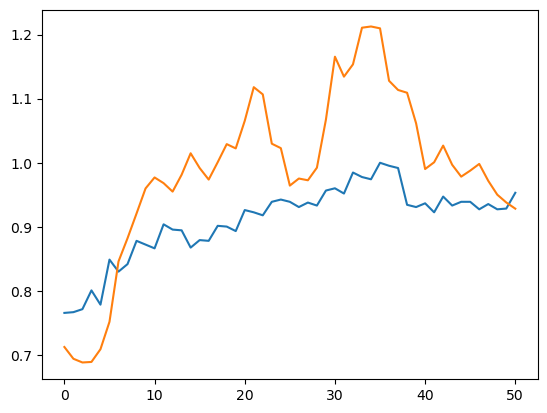

In [284]:
fig, ax = plt.subplots()
ax.plot(list(range(len(y_test))), y_test, list(range(len(y_test))), y_pred)
fig.show()

/Users/nikita/anaconda3/envs/PR2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


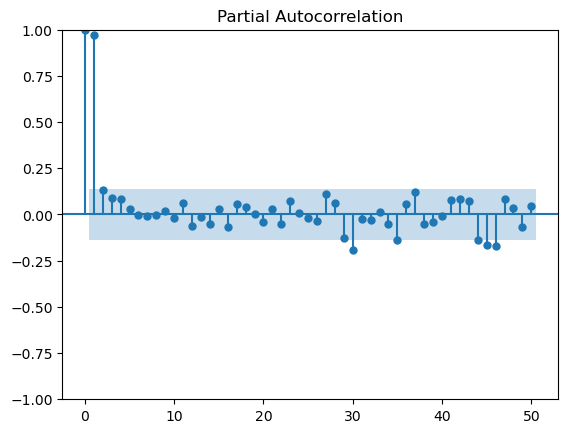

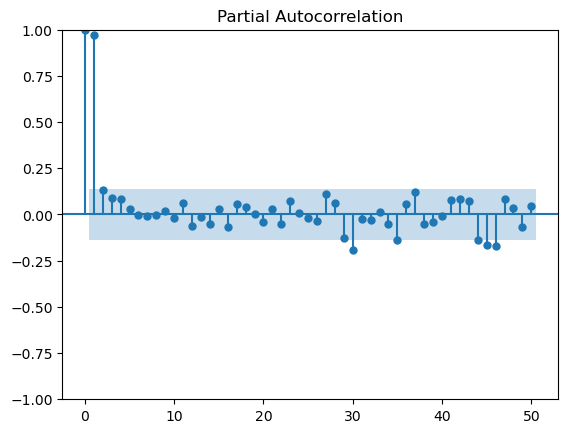

In [285]:
plot_pacf(df['avg price'], lags=50)

## Порiвняти всi моделi i обрати найкращу з них.

Єдина модель, яка виявилася здатною до генералізації та пристосувалася до різкого росту акцій в тестувальному наборі -- згорткова модель. Отже, вона є найкращою для даного набору даних